
# Categorize Expense Data

### Test the LLM

In [ ]:
#!pip3 install langchain_community

In [8]:
from langchain_community.llms import Ollama

In [9]:
llm = Ollama(model="llama3")
llm.invoke("what country is the krabi province in?")

'The Krabi Province is located in Thailand. Specifically, it is one of the 77 provinces (changwat) of Thailand and is situated in the southern part of the country. It borders the Andaman Sea to the west, Satun Province to the southwest, Surat Thani Province to the southeast, and Nakhon Si Thammarat Province to the east. Krabi Province is known for its beautiful beaches, islands, and limestone cliffs, making it a popular tourist destination in Thailand.'

### Import Data

In [10]:
# Read the transactions_2022_2023.csv file 
import pandas as pd
df = pd.read_csv("transactions_2022_2023.csv")
df.head()

,Date,Name / Description,Expense/Income,Amount (EUR)
0,2023-12-30,Belastingdienst,Expense,9.96
1,2023-12-30,Tesco Breda,Expense,17.53
2,2023-12-30,Monthly Appartment Rent,Expense,451.00
3,2023-12-30,Vishandel Sier Amsterdam,Expense,12.46
4,2023-12-29,Selling Paintings,Income,13.63


In [2]:
# Get unique transactions in the Name / Description column
unique_transactions = df["Name / Description"].unique()
len(unique_transactions)

23

In [3]:
unique_transactions[1:10]

array(['Tesco Breda', 'Monthly Appartment Rent',
       'Vishandel Sier Amsterdam', 'Selling Paintings',
       'Spotify Ab By Adyen', 'Tk Maxx Amsterdam Da', 'Consulting',
       'Aidsfonds', 'Tls Bv Inz Ov-Chipkaart'], dtype=object)

### Categorize Transection with LLM

In [13]:
# Get index list
#https://stackoverflow.com/questions/47518609/for-loop-range-and-interval-how-to-include-last-step
def hop(start, stop, step):
    for i in range(start, stop, step):
        yield i
    yield stop

index_list = list(hop(0, len(unique_transactions), 5))
index_list

[0, 5, 10, 15, 20, 23]

In [14]:
def categorize_transactions(transaction_names, llm):
    response = llm.invoke("Can you add an appropriate category to the following expenses. For example: Spotify AB by Adyen - Entertainment, Beta Boulders Ams Amsterdam Nld - Sport, etc.. Categories should be less than 4 words. " + transaction_names)
    response = response.split('\n')

    print(response)

    # Put in dataframe
    categories_df = pd.DataFrame({'Transaction vs category': response})
    categories_df[['Transaction', 'Category']] = categories_df['Transaction vs category'].str.split(' - ', expand=True)
    
    return categories_df

In [16]:
# Test out the function
categorize_transactions('ISS Catering Services De Meern, Taxi Utrecht, Etos AMSTERDAM NLD, Bistro Bar Amsterdam',
                        llm)

['Here are the added categories:', '', '* ISS Catering Services De Meern - Food', '* Taxi Utrecht - Transportation', '* Etos AMSTERDAM NLD - Health', '* Bistro Bar Amsterdam - Entertainment']


,Transaction vs category,Transaction,Category
0,Here are the added categories:,Here are the added categories:,None
1,,,None
2,* ISS Catering Services De Meern - Food,* ISS Catering Services De Meern,Food
3,* Taxi Utrecht - Transportation,* Taxi Utrecht,Transportation
4,* Etos AMSTERDAM NLD - Health,* Etos AMSTERDAM NLD,Health
5,* Bistro Bar Amsterdam - Entertainment,* Bistro Bar Amsterdam,Entertainment


In [17]:
# Intialise the categories_df_all dataframe
categories_df_all = pd.DataFrame()

# Loop through the index_list
for i in range(0, len(index_list)-1):
    transaction_names = unique_transactions[index_list[i]:index_list[i+1]]
    transaction_names = ','.join(transaction_names)

    categories_df = categorize_transactions(transaction_names, llm)
    categories_df_all = pd.concat([categories_df_all, categories_df], ignore_index=True)

['Here are the categorized expenses:', '', '* Spotify AB by Adyen - Entertainment', '* Beta Boulders Ams Amsterdam Nld - Sport', '* Belastingdienst - Taxes', '* Tesco Breda - Grocery', '* Monthly Appartment Rent - Housing', '* Vishandel Sier Amsterdam - Food', '* Selling Paintings - Miscellaneous', '', "Note: I've kept the categories short and concise, as per your request. Let me know if you need any further changes!"]
['Here are the categorized expenses:', '', '1. Spotify AB by Adyen - Entertainment', '2. Tk Maxx Amsterdam DA - Shopping', '3. Consulting - Professional Services', '4. Aidsfonds - Charity/Donation', '5. Tls BV Inz Ov-Chipkaart - Transportation']
['Here are the categorized expenses:', '', '1. Spotify AB by Adyen - Entertainment', '2. Beta Boulders Ams Amsterdam Nld - Sport', '3. Etos Amsterdam - Health', '4. Salary - Income', '5. Bouldermuur Bv Amsterdam - Rent/Mortgage (assuming this is a business expense)', '6. Birtat Restaurant Amsterdam - Food/Dining']
['Here are the 

In [18]:
categories_df_all

,Transaction vs category,Transaction,Category
0,Here are the categorized expenses:,Here are the categorized expenses:,None
1,,,None
2,* Spotify AB by Adyen - Entertainment,* Spotify AB by Adyen,Entertainment
3,* Beta Boulders Ams Amsterdam Nld - Sport,* Beta Boulders Ams Amsterdam Nld,Sport
4,* Belastingdienst - Taxes,* Belastingdienst,Taxes
5,* Tesco Breda - Grocery,* Tesco Breda,Grocery
6,* Monthly Appartment Rent - Housing,* Monthly Appartment Rent,Housing
7,* Vishandel Sier Amsterdam - Food,* Vishandel Sier Amsterdam,Food
8,* Selling Paintings - Miscellaneous,* Selling Paintings,Miscellaneous
9,,,None


In [19]:
# Get unique categories in categories_df_all
unique_categories = categories_df_all["Category"].unique()
unique_categories

array([None, 'Entertainment', 'Sport', 'Taxes', 'Grocery', 'Housing',
       'Food', 'Miscellaneous', 'Shopping', 'Professional Services',
       'Charity/Donation', 'Transportation', 'Health', 'Income',
       'Rent/Mortgage (assuming this is a business expense)',
       'Food/Dining', 'Work', 'Food/Beverages', 'Personal/Interest',
       'Technology', 'Gym/Fitness', 'Media'], dtype=object)

In [20]:
# Drop NA values
categories_df_all = categories_df_all.dropna()

In [21]:
categories_df_all

,Transaction vs category,Transaction,Category
2,* Spotify AB by Adyen - Entertainment,* Spotify AB by Adyen,Entertainment
3,* Beta Boulders Ams Amsterdam Nld - Sport,* Beta Boulders Ams Amsterdam Nld,Sport
4,* Belastingdienst - Taxes,* Belastingdienst,Taxes
5,* Tesco Breda - Grocery,* Tesco Breda,Grocery
6,* Monthly Appartment Rent - Housing,* Monthly Appartment Rent,Housing
7,* Vishandel Sier Amsterdam - Food,* Vishandel Sier Amsterdam,Food
8,* Selling Paintings - Miscellaneous,* Selling Paintings,Miscellaneous
13,1. Spotify AB by Adyen - Entertainment,1. Spotify AB by Adyen,Entertainment
14,2. Tk Maxx Amsterdam DA - Shopping,2. Tk Maxx Amsterdam DA,Shopping
15,3. Consulting - Professional Services,3. Consulting,Professional Services


In [22]:
# Remove the numbering eg "1. " from Transaction column
categories_df_all['Transaction'] = categories_df_all['Transaction'].str.replace(r'\d+\.\s+', '', regex=True)
categories_df_all

/var/folders/ly/kq_n217s673dj1jc6gckrs3h0000gn/T/ipykernel_11901/3959838756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories_df_all['Transaction'] = categories_df_all['Transaction'].str.replace(r'\d+\.\s+', '', regex=True)


,Transaction vs category,Transaction,Category
2,* Spotify AB by Adyen - Entertainment,* Spotify AB by Adyen,Entertainment
3,* Beta Boulders Ams Amsterdam Nld - Sport,* Beta Boulders Ams Amsterdam Nld,Sport
4,* Belastingdienst - Taxes,* Belastingdienst,Taxes
5,* Tesco Breda - Grocery,* Tesco Breda,Grocery
6,* Monthly Appartment Rent - Housing,* Monthly Appartment Rent,Housing
7,* Vishandel Sier Amsterdam - Food,* Vishandel Sier Amsterdam,Food
8,* Selling Paintings - Miscellaneous,* Selling Paintings,Miscellaneous
13,1. Spotify AB by Adyen - Entertainment,Spotify AB by Adyen,Entertainment
14,2. Tk Maxx Amsterdam DA - Shopping,Tk Maxx Amsterdam DA,Shopping
15,3. Consulting - Professional Services,Consulting,Professional Services


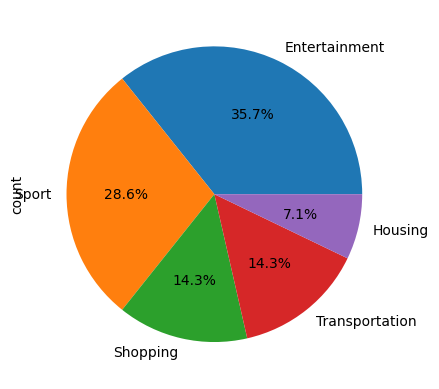

In [23]:
# Plot the top 5 categories in pie chart of the categories_df_all dataframe
categories_df_all['Category'].value_counts().head(5).plot.pie(autopct='%1.1f%%')

import matplotlib.pyplot as plt

